## Ejercicio 5.33
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_5.33.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

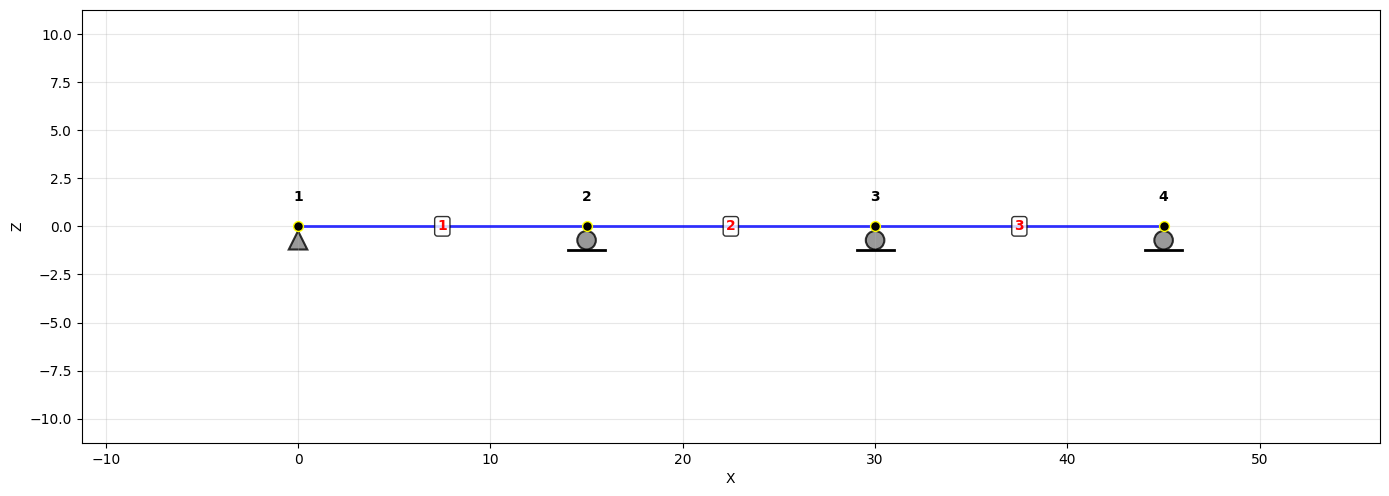

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 1
I = 400 * 10**-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=15, z=0)
system.defineNode(3, x=30, z=0)
system.defineNode(4, x=45, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(2, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(4, ux=False, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)
system.defineElement(3, 3, 4, A=A, E=E, I=I)

# Asignación de Cargas
system.assignElement.uniformLoad(1, w=18)
system.assignElement.pointForce(2, P=90, distance=1/3)
system.assignElement.pointForce(2, P=90, distance=2/3)
system.assignElement.trapezoidalLoad(3, wi=25, wj=0)
system.assignJoint.force(4, fx=0, fz=0, my=120)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 4
Número de elementos: 3
Grados de libertad totales: 12
Grados de libertad restringidos (desplazamientos conocidos): 6 de 12
GL restringidos: [ 0  1  2  4  7 10]
Grados de libertad libres (fuerzas conocidas): 6 de 12
GL libres: [ 3  5  6  8  9 11]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (6x6):
  |         3 |          5 |          6 |          8 |          9 |         11 |

  |   26666667 |          0 |  -13333333 |          0 |          0 |          0 |
  |          0 |      37333 |          0 |      10667 |          0 |          0 |
  |  -13333333 |          0 |   26666667 |          0 |  -13333333 |          0 |
  |          0 |   

In [6]:
system.getInfoNodes()

Node 1: (0, 0) - Fijo
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-1.9391e-02
  Fuerzas: Fx=0.000, Fz=108.867, My=0.000

Node 2: (15, 0) - Móvil en X
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=7.1406e-03
  Fuerzas: Fx=0.000, Fz=254.300, My=0.000

Node 3: (30, 0) - Móvil en X
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=-5.6562e-03
  Fuerzas: Fx=0.000, Fz=242.800, My=0.000

Node 4: (45, 0) - Móvil en X
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=1.7242e-02
  Fuerzas: Fx=0.000, Fz=31.533, My=120.000


In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 1
PROPIEDADES
  Longitud: 15.000
  Área (A): 1.0000e+00
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 4.0000e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  1) Carga uniforme: w=18.000 en toda la longitud

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 13333333.333 |      0.000 |      0.000 | -13333333.333 |      0.000 |      0.000 |
  |      0.000 |     71.111 |      0.000 |      0.000

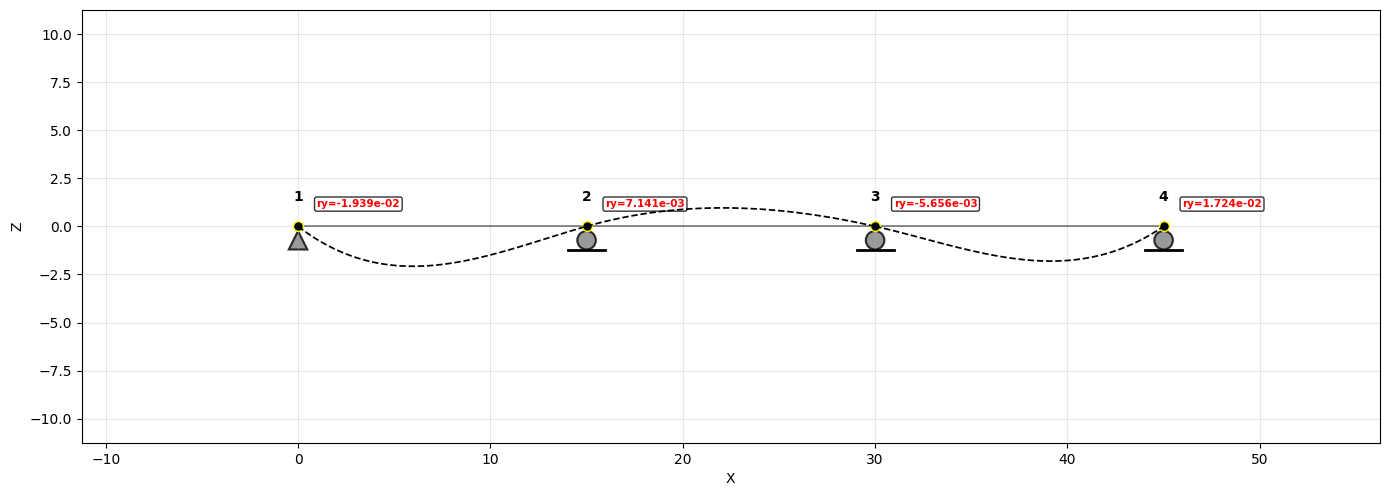

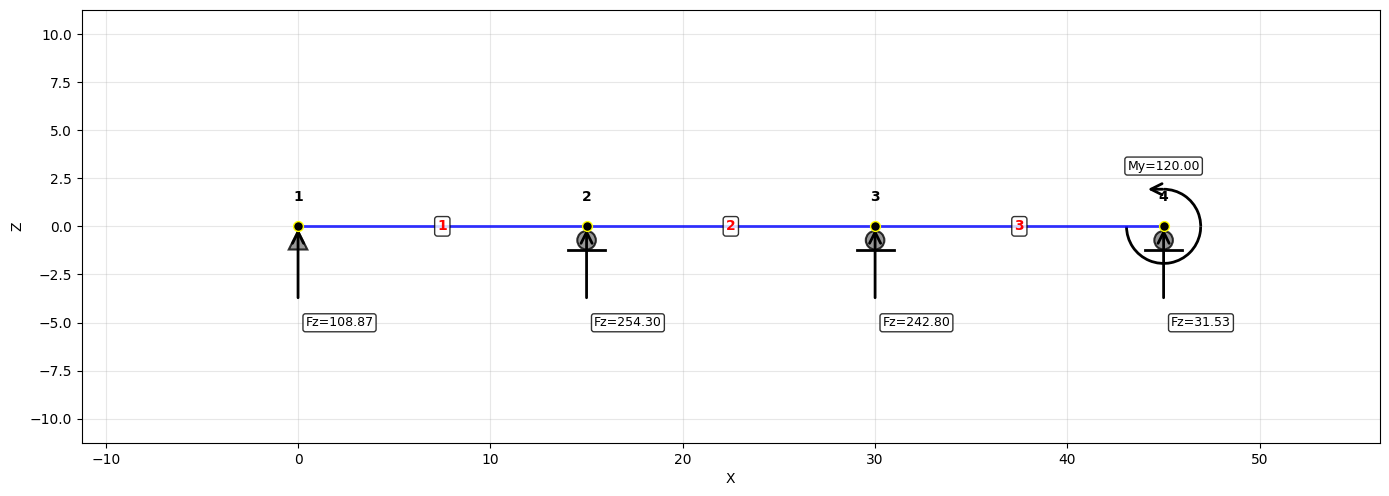

In [5]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.2)
plotter.showReactions()